In [271]:
# This notebook will use the dataset
# COVID-19 and forex to predict the forex spot price.
# Use seaborn for pairplot
!pip install seaborn

# Use some functions from tensorflow_docs
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-1r0ie4ey
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-1r0ie4ey
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.037c0e84f64fd6aa5b77f2671dcc34176b00f4ca7_-cp36-none-any.whl size=123963 sha256=33ea9af1df1b515ae7911fdca13e7ca353239155479a2dcf14d4376c9d093d08
  Stored in directory: /tmp/pip-ephem-wheel-cache-jf7s6vab/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [272]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [273]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers



print(tf.__version__)

2.2.0


In [274]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling



In [275]:
# Importing dataset using pandas

covid_dataset_data= pd.read_csv('covid.csv', na_values = "?", comment='\t', skipinitialspace=True)
covid_dataset = covid_dataset_data.copy()
covid_dataset = covid_dataset.dropna()
covid_dataset.tail()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
27765,ZWE,Africa,Zimbabwe,2020-06-18,401.0,7.0,4.0,0.0,26.980,0.471,0.269,0.000,25815.0,524.0,1.737,0.035,392.0,0.026,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27766,ZWE,Africa,Zimbabwe,2020-06-19,463.0,62.0,4.0,0.0,31.151,4.171,0.269,0.000,26117.0,302.0,1.757,0.020,369.0,0.025,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27767,ZWE,Africa,Zimbabwe,2020-06-20,479.0,16.0,4.0,0.0,32.228,1.077,0.269,0.000,26451.0,334.0,1.780,0.022,349.0,0.023,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27768,ZWE,Africa,Zimbabwe,2020-06-21,486.0,7.0,6.0,2.0,32.699,0.471,0.404,0.135,26857.0,406.0,1.807,0.027,393.0,0.026,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27769,ZWE,Africa,Zimbabwe,2020-06-22,489.0,3.0,6.0,0.0,32.901,0.202,0.404,0.000,27221.0,364.0,1.831,0.024,373.0,0.025,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


In [276]:
forex_dataset_data= pd.read_csv('GBP_USD.csv', na_values = "?", comment='\t', skipinitialspace=True)
forex_dataset = forex_dataset_data.copy()
forex_dataset = forex_dataset_data.dropna()
forex_dataset.tail()


,Date,Price,Open,High,Low,Change %
150,"Dec 06, 2019",1.3137,1.3157,1.3167,1.3100,-0.15%
151,"Dec 05, 2019",1.3157,1.3105,1.3168,1.3102,0.40%
152,"Dec 04, 2019",1.3104,1.2992,1.3121,1.2981,0.85%
153,"Dec 03, 2019",1.2994,1.2938,1.3013,1.2930,0.44%
154,"Dec 02, 2019",1.2937,1.2917,1.2951,1.2895,0.02%


In [277]:
# Isolate covid_date
import time 
covid_date = covid_dataset['date']
new_covid_dates = [time.strptime(x.replace("-"," "), '%Y %m %d')for x in covid_date]
print(new_covid_dates)
covid_dataset['date'] = new_covid_dates
covid_dataset.tail()



[time.struct_time(tm_year=2020, tm_mon=3, tm_mday=15, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=75, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=17, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=77, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=18, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=78, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=19, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=79, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=20, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=80, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=81, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=22, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=6, tm_yday=82, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=3, tm_mday=23, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=83, tm_isdst=-1), time.struct_time(tm_year=2020, 

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
27765,ZWE,Africa,Zimbabwe,"(2020, 6, 18, 0, 0, 0, 3, 170, -1)",401.0,7.0,4.0,0.0,26.980,0.471,0.269,0.000,25815.0,524.0,1.737,0.035,392.0,0.026,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27766,ZWE,Africa,Zimbabwe,"(2020, 6, 19, 0, 0, 0, 4, 171, -1)",463.0,62.0,4.0,0.0,31.151,4.171,0.269,0.000,26117.0,302.0,1.757,0.020,369.0,0.025,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27767,ZWE,Africa,Zimbabwe,"(2020, 6, 20, 0, 0, 0, 5, 172, -1)",479.0,16.0,4.0,0.0,32.228,1.077,0.269,0.000,26451.0,334.0,1.780,0.022,349.0,0.023,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27768,ZWE,Africa,Zimbabwe,"(2020, 6, 21, 0, 0, 0, 6, 173, -1)",486.0,7.0,6.0,2.0,32.699,0.471,0.404,0.135,26857.0,406.0,1.807,0.027,393.0,0.026,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49
27769,ZWE,Africa,Zimbabwe,"(2020, 6, 22, 0, 0, 0, 0, 174, -1)",489.0,3.0,6.0,0.0,32.901,0.202,0.404,0.000,27221.0,364.0,1.831,0.024,373.0,0.025,tests performed,70.37,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49


In [278]:
# Isolate forex_date
import time 
forex_date = forex_dataset['Date']
new_forex_dates = [time.strptime(x.replace(',', ""), '%b %d %Y')for x in forex_date]
print(new_forex_dates)
forex_dataset['Date'] = new_forex_dates
forex_dataset.tail()

[time.struct_time(tm_year=2020, tm_mon=7, tm_mday=3, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=185, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=7, tm_mday=2, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=184, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=7, tm_mday=1, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=183, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=6, tm_mday=30, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=1, tm_yday=182, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=6, tm_mday=29, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=0, tm_yday=181, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=6, tm_mday=26, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=4, tm_yday=178, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=6, tm_mday=25, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=3, tm_yday=177, tm_isdst=-1), time.struct_time(tm_year=2020, tm_mon=6, tm_mday=24, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=176, tm_isdst=-1), time.struct_time(tm_year=2

,Date,Price,Open,High,Low,Change %
150,"(2019, 12, 6, 0, 0, 0, 4, 340, -1)",1.3137,1.3157,1.3167,1.3100,-0.15%
151,"(2019, 12, 5, 0, 0, 0, 3, 339, -1)",1.3157,1.3105,1.3168,1.3102,0.40%
152,"(2019, 12, 4, 0, 0, 0, 2, 338, -1)",1.3104,1.2992,1.3121,1.2981,0.85%
153,"(2019, 12, 3, 0, 0, 0, 1, 337, -1)",1.2994,1.2938,1.3013,1.2930,0.44%
154,"(2019, 12, 2, 0, 0, 0, 0, 336, -1)",1.2937,1.2917,1.2951,1.2895,0.02%


In [279]:
# Merging dates from two tables
dataset = pd.merge(left=forex_dataset, left_on='Date',
         right=covid_dataset, right_on='date')
print(dataset)


                                    Date  ...  life_expectancy
0      (2020, 7, 2, 0, 0, 0, 3, 184, -1)  ...            77.01
1      (2020, 7, 1, 0, 0, 0, 2, 183, -1)  ...            80.28
2      (2020, 7, 1, 0, 0, 0, 2, 183, -1)  ...            77.01
3      (2020, 7, 1, 0, 0, 0, 2, 183, -1)  ...            67.27
4     (2020, 6, 30, 0, 0, 0, 1, 182, -1)  ...            80.28
...                                  ...  ...              ...
1331   (2020, 1, 14, 0, 0, 0, 1, 14, -1)  ...            75.05
1332   (2020, 1, 13, 0, 0, 0, 0, 13, -1)  ...            75.05
1333   (2020, 1, 10, 0, 0, 0, 4, 10, -1)  ...            75.05
1334     (2020, 1, 9, 0, 0, 0, 3, 9, -1)  ...            75.05
1335     (2020, 1, 8, 0, 0, 0, 2, 8, -1)  ...            75.05

[1336 rows x 40 columns]


In [280]:
# Clean the data
# Check if it contains unknown values
dataset.sum()
dataset.tail()


,Date,Price,Open,High,Low,Change %,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
1331,"(2020, 1, 14, 0, 0, 0, 1, 14, -1)",1.3018,1.2988,1.3034,1.2952,0.22%,MEX,North America,Mexico,"(2020, 1, 14, 0, 0, 0, 1, 14, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,327.0,52.0,0.003,0.0,30.0,0.0,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
1332,"(2020, 1, 13, 0, 0, 0, 0, 13, -1)",1.2990,1.3056,1.3064,1.2961,-0.54%,MEX,North America,Mexico,"(2020, 1, 13, 0, 0, 0, 0, 13, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,275.0,37.0,0.002,0.0,27.0,0.0,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
1333,"(2020, 1, 10, 0, 0, 0, 4, 10, -1)",1.3061,1.3067,1.3097,1.3042,-0.05%,MEX,North America,Mexico,"(2020, 1, 10, 0, 0, 0, 4, 10, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,213.0,39.0,0.002,0.0,25.0,0.0,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
1334,"(2020, 1, 9, 0, 0, 0, 3, 9, -1)",1.3067,1.3100,1.3126,1.3013,-0.24%,MEX,North America,Mexico,"(2020, 1, 9, 0, 0, 0, 3, 9, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,44.0,0.001,0.0,22.0,0.0,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05
1335,"(2020, 1, 8, 0, 0, 0, 2, 8, -1)",1.3098,1.3124,1.3170,1.3078,-0.21%,MEX,North America,Mexico,"(2020, 1, 8, 0, 0, 0, 2, 8, -1)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,130.0,15.0,0.001,0.0,18.0,0.0,people tested,0.0,128932753.0,66.444,29.3,6.857,4.321,17336.469,2.5,152.783,13.06,6.9,21.4,87.847,1.38,75.05


In [281]:
# Split the data into train and test
# We will use our test set in the final evaluation of our model
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_dataset.tail()


,Date,Price,Open,High,Low,Change %,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
147,"(2020, 6, 17, 0, 0, 0, 2, 169, -1)",1.2557,1.2573,1.2589,1.2510,-0.16%,UGA,Africa,Uganda,"(2020, 6, 17, 0, 0, 0, 2, 169, -1)",724.0,19.0,0.0,0.0,15.828,0.415,0.000,0.000,135608.0,2702.0,2.965,0.059,2598.0,0.057,samples tested,84.26,45741000.0,213.759,16.4,2.168,1.308,1697.707,41.6,213.333,2.50,3.4,16.7,21.222,0.50,63.37
160,"(2020, 6, 16, 0, 0, 0, 1, 168, -1)",1.2577,1.2605,1.2688,1.2553,-0.21%,MMR,Asia,Myanmar,"(2020, 6, 16, 0, 0, 0, 1, 168, -1)",262.0,0.0,6.0,0.0,4.815,0.000,0.110,0.000,55412.0,2061.0,1.018,0.038,1857.0,0.034,samples tested,80.56,54409794.0,81.721,29.1,5.732,3.120,5591.597,6.4,202.104,4.61,6.3,35.2,79.287,0.90,67.13
750,"(2020, 5, 5, 0, 0, 0, 1, 126, -1)",1.2436,1.2443,1.2485,1.2421,-0.06%,MMR,Asia,Myanmar,"(2020, 5, 5, 0, 0, 0, 1, 126, -1)",161.0,6.0,6.0,0.0,2.959,0.110,0.110,0.000,9295.0,257.0,0.171,0.005,241.0,0.004,samples tested,84.26,54409794.0,81.721,29.1,5.732,3.120,5591.597,6.4,202.104,4.61,6.3,35.2,79.287,0.90,67.13
859,"(2020, 4, 27, 0, 0, 0, 0, 118, -1)",1.2429,1.2369,1.2456,1.2359,0.49%,ZAF,Africa,South Africa,"(2020, 4, 27, 0, 0, 0, 0, 118, -1)",4546.0,185.0,87.0,1.0,76.650,3.119,1.467,0.017,178470.0,9827.0,3.009,0.166,8137.0,0.137,people tested,87.96,59308690.0,46.754,27.3,5.344,3.053,12294.876,18.9,200.380,5.52,8.1,33.2,43.993,2.32,64.13
952,"(2020, 4, 17, 0, 0, 0, 4, 108, -1)",1.2501,1.2457,1.2523,1.2407,0.35%,KEN,Africa,Kenya,"(2020, 4, 17, 0, 0, 0, 4, 108, -1)",234.0,9.0,11.0,1.0,4.352,0.167,0.205,0.019,10774.0,450.0,0.200,0.008,655.0,0.012,units unclear,91.67,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.40,66.70


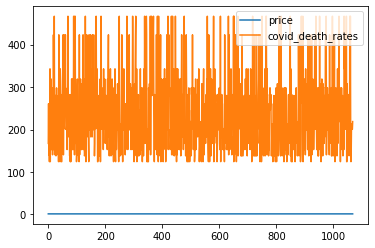

In [282]:
# Inspect the data
# Look at join distributions of afew pairs of collumns from the training set
# Need to revise what this graph does
import matplotlib.pyplot as plt
train_dataset.tail()
# sns.pairplot(train_dataset[["Price", "cvd_death_rate"]])
plt.plot([x for x in range(len(train_dataset["Price"]))], train_dataset["Price"],label="price")
plt.plot([x for x in range(len(train_dataset["cvd_death_rate"]))], train_dataset["cvd_death_rate"], label="covid_death_rates")
plt.legend() 
plt.show()


In [283]:
# Overall statistics
# Transpose: Row to collumn
train_stats = train_dataset.describe()
train_stats.pop("Price")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Open,1069.0,1.239744e+00,2.507310e-02,1.148700e+00,1.226400e+00,1.241400e+00,1.252100e+00,1.321600e+00
High,1069.0,1.247035e+00,2.221338e-02,1.174100e+00,1.236400e+00,1.247400e+00,1.258900e+00,1.321600e+00
Low,1069.0,1.232382e+00,2.666030e-02,1.140900e+00,1.221000e+00,1.233500e+00,1.245000e+00,1.308300e+00
total_cases,1069.0,2.002562e+04,5.147957e+04,0.000000e+00,2.180000e+02,1.214000e+03,1.171900e+04,4.731050e+05
new_cases,1069.0,7.510767e+02,1.849456e+03,-1.150000e+02,5.000000e+00,6.500000e+01,4.860000e+02,1.692200e+04
total_deaths,1069.0,8.895790e+02,2.700079e+03,0.000000e+00,4.000000e+00,2.500000e+01,3.770000e+02,2.506000e+04
new_deaths,1069.0,3.350514e+01,1.173559e+02,0.000000e+00,0.000000e+00,1.000000e+00,1.800000e+01,2.003000e+03
total_cases_per_million,1069.0,2.457167e+02,5.060603e+02,0.000000e+00,5.226000e+00,5.842300e+01,2.160730e+02,3.301978e+03
new_cases_per_million,1069.0,7.422302e+00,1.389010e+01,-2.514000e+00,2.020000e-01,1.704000e+00,8.334000e+00,1.175530e+02
total_deaths_per_million,1069.0,1.225877e+01,3.939132e+01,0.000000e+00,1.100000e-01,1.283000e+00,4.061000e+00,2.593650e+02


In [284]:
train_labels = train_dataset.pop('Price')
test_labels = test_dataset.pop('Price')

In [285]:
# It is good practice to normalize features that use different scales and ranges. 
# Although the model might converge without feature normalization, 
# it makes training more difficult, and it makes the resulting model dependent 
# on the choice of units used in the input. 

# Note: Although we intentionally generate these statistics from only the training dataset, 
# these statistics will also be used to normalize the test dataset. 
# We need to do that to project the test dataset into the same distribution that the model 
# has been trained on.

def norm(x, stats):
  mean_diff = pd.DataFrame( x.values - stats['mean'].to_frame().transpose().values, columns=x.columns )
  std_diff  = pd.DataFrame( x.values / stats['std'].to_frame().transpose().values, columns=x.columns )
  return std_diff
  # return (x - train_stats['mean']) / train_stats['std']

columns_to_remove = set( list( train_dataset.columns ) ) - set( list( train_stats['mean'].to_frame().transpose().columns ) )
for col in columns_to_remove : 
  train_dataset.pop( col ) 
  test_dataset.pop( col ) 
normed_train_data = norm(train_dataset, train_stats)
normed_test_data = norm(test_dataset, train_stats)

# test_stats = test_dataset.describe().transpose()
# test_stats
# columns_to_remove = set( list( test_dataset.columns ) ) - set( list( test_stats['mean'].to_frame().transpose().columns ) )
# for col in columns_to_remove : 
#   test_dataset.pop( col ) 
  
# normed_test_data = norm(test_dataset, train_stats)


In [286]:
# Building a model
# Let's build our model. Here, we'll use a Sequential model with 
# two densely connected hidden layers, and an output layer that 
# returns a single, continuous value. The model building steps are 
# wrapped in a function, build_model, since we'll create a 
# second model, later on.

def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])
# learning rate
  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [287]:
model = build_model()

In [288]:
# Inspect the model
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 65        
Total params: 6,337
Trainable params: 6,337
Non-trainable params: 0
_________________________________________________________________


In [289]:
# Take a batch of 10 examples from the training data and call model.predict on it.
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-3.5199044],
       [-3.3325243],
       [-2.9648166],
       [-2.9099827],
       [-2.9094915],
       [-2.8031552],
       [-3.1908395],
       [-2.9009938],
       [-3.092682 ],
       [-2.9255877]], dtype=float32)

In [290]:
# Train the model
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:2.4278,  mae:1.1024,  mse:2.4278,  val_loss:0.7652,  val_mae:0.8338,  val_mse:0.7652,  
....................................................................................................
Epoch: 100, loss:0.0029,  mae:0.0462,  mse:0.0029,  val_loss:0.0069,  val_mae:0.0815,  val_mse:0.0069,  
....................................................................................................
Epoch: 200, loss:0.0009,  mae:0.0283,  mse:0.0009,  val_loss:0.0007,  val_mae:0.0244,  val_mse:0.0007,  
....................................................................................................
Epoch: 300, loss:0.0006,  mae:0.0209,  mse:0.0006,  val_loss:0.0002,  val_mae:0.0109,  val_mse:0.0002,  
....................................................................................................
Epoch: 400, loss:0.0005,  mae:0.0189,  mse:0.0005,  val_loss:0.0002,  val_mae:0.0128,  val_mse:0.0002,  
........................................................................

In [298]:
# predicted output that we have
print(model.predict(test_dataset))

[[  341572.7 ]
 [  456694.2 ]
 [92831120.  ]
 [ 3590094.5 ]
 [14857790.  ]
 [11039146.  ]
 [ 3493726.5 ]
 [  456227.44]
 [ 3616110.  ]
 [  482663.9 ]
 [14849912.  ]
 [ 2108968.5 ]
 [ 3587964.5 ]
 [14845545.  ]
 [  482131.94]
 [18190612.  ]
 [ 8635528.  ]
 [ 3615087.  ]
 [  553247.75]
 [ 3056059.2 ]
 [  989195.25]
 [ 1187905.6 ]
 [  453570.3 ]
 [14823808.  ]
 [ 3054752.8 ]
 [  340338.56]
 [18184238.  ]
 [ 3614060.  ]
 [  793363.4 ]
 [ 3054444.5 ]
 [  988944.4 ]
 [ 7650595.  ]
 [18182300.  ]
 [  793270.5 ]
 [11011246.  ]
 [  340166.25]
 [  552889.  ]
 [ 3053418.5 ]
 [11007948.  ]
 [ 3462915.5 ]
 [ 2104379.8 ]
 [ 1429115.  ]
 [14802274.  ]
 [  339922.8 ]
 [ 8617258.  ]
 [ 1951899.2 ]
 [  479601.94]
 [  552674.3 ]
 [10996022.  ]
 [  339832.06]
 [ 7644856.  ]
 [ 1415102.6 ]
 [14779716.  ]
 [  449630.44]
 [ 2102044.5 ]
 [ 4108798.  ]
 [92307330.  ]
 [18169840.  ]
 [ 1184537.2 ]
 [  448781.78]
 [ 7641701.  ]
 [92281150.  ]
 [ 4098564.5 ]
 [  552397.  ]
 [  988245.9 ]
 [10979642.  ]
 [ 2099905

In [291]:
# Visualize the model's training progress using the stats stored in the history object.
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,0.000246,0.013462,0.000246,0.000231,0.013286,0.000231,995
996,0.000238,0.013131,0.000238,0.000207,0.012721,0.000207,996
997,0.000248,0.013780,0.000248,0.000172,0.010969,0.000172,997
998,0.000225,0.012848,0.000225,0.000246,0.014100,0.000246,998
999,0.000253,0.014159,0.000253,0.000168,0.010818,0.000168,999


In [292]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

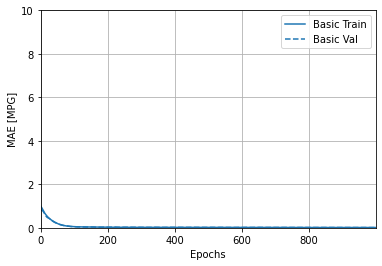

In [293]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

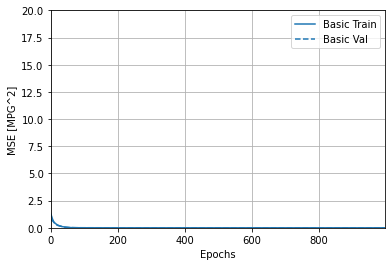

In [294]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [295]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(normed_train_data, train_labels, 
                    epochs=EPOCHS, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:1.4161,  mae:0.6821,  mse:1.4161,  val_loss:0.0793,  val_mae:0.2158,  val_mse:0.0793,  
...........

ValueError: ignored

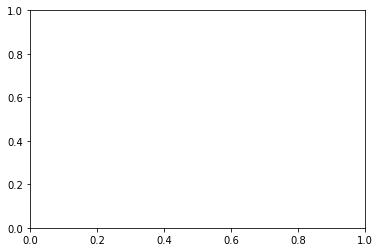

In [296]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

In [ ]:
# Make predictions
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")